In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import helper_functions as hf


## Load and sanitize dataframe

In [4]:
df = hf.get_players()

print(f"{len(df)} entries, of which {np.sum(~df.is_postdoc)} are PhDs and {np.sum(df.is_postdoc)} are postdocs")
df.head(5)
# Conflicting sports
# np.sum(df["volleyball"] & df["basketball"])
# np.sum(df["football"] & df["tennis"])
# df[df["capture_the_flag"] & df["spikeball"]]["nickname"].tolist()


90 entries, of which 70 are PhDs and 20 are postdocs


,nickname,institute,is_postdoc,avail_monday,avail_tuesday,avail_thursday,avail_friday,wants_basketball,basketball,wants_running_sprints,...,subteam_chess,subteam_football,subteam_tennis,subteam_capture_the_flag,subteam_spikeball,subteam_beer_pong,subteam_foosball,subteam_ping_pong,num_sports_attending,attendance_ratio
0,Magnificent Barracuda,MPE,False,True,True,True,True,False,False,True,...,NaN,1,2,R,2,3,2,7,8,0.888889
1,Animated Yak,MPE,False,True,True,True,True,False,False,False,...,NaN,1,R,R,3,2,3,2,6,0.750000
2,Failing Muskrat,IPP,False,True,True,True,True,True,True,False,...,NaN,1,R,1,NaN,NaN,NaN,6,4,0.666667
3,Nutty Sheep,MPE,False,True,False,True,True,False,False,True,...,NaN,NaN,NaN,1,R,NaN,NaN,14,4,0.800000
4,Excited Rabbit,IPP,False,True,True,False,False,True,True,False,...,2,1,NaN,NaN,NaN,NaN,NaN,16,3,0.600000


,nickname,num_sports_not_avail,wants_basketball,basketball,wants_running_sprints,running_sprints,wants_volleyball,volleyball,wants_chess,chess,...,wants_capture_the_flag,capture_the_flag,wants_spikeball,spikeball,wants_beer_pong,beer_pong,wants_foosball,foosball,wants_ping_pong,ping_pong
4,Excited Rabbit,4,True,True,False,False,True,True,True,True,...,True,False,True,False,True,False,True,False,True,True
5,Nice Albatross,2,True,False,False,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
14,Sneaky Quokka,1,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
28,Hasty Emu,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
31,Earnest Snail,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,Dishonest Fangtooth,2,True,False,False,False,True,False,False,False,...,False,False,True,True,True,True,True,True,True,True
16,Fine Oyster,1,False,False,False,False,True,True,False,False,...,False,False,False,False,True,True,True,True,False,False
9,Neglected Harrier,3,False,False,True,False,False,False,False,False,...,True,False,True,False,True,True,False,False,True,True
10,Rewarding Ermine,2,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,True,False,False,False
21,Concrete Alpaca,1,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,True,True,False,False


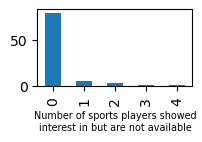

In [10]:
# df.plot.hist("num_sports_not_avail")
fig, ax = plt.subplots(figsize=(2, 1))
df["num_sports_not_avail"].value_counts().sort_index().plot.bar()
plt.xlabel("Number of sports players showed\ninterest in but are not available", size="x-small")
df[df["num_sports_not_avail"] > 0][["nickname", "num_sports_not_avail"] + [col for col in df.columns if "wants" in col or col in hf.SPORTS_LIST]]


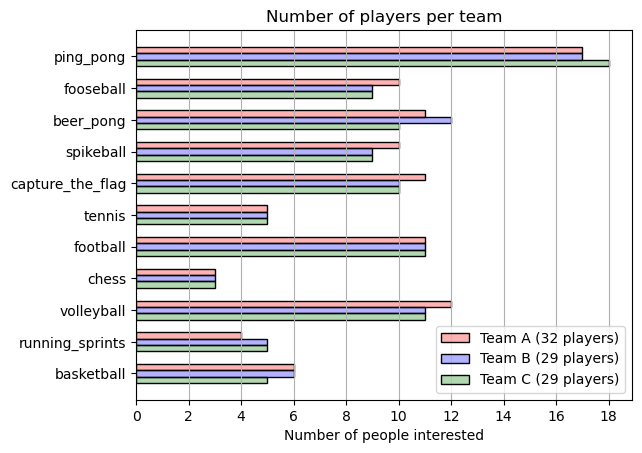

In [4]:
fig, ax = plt.subplots()
for team in hf.ALL_TEAMS:
    team.plot_sports_num()
ax.set_title("Number of players per team")
ax.legend();


In [23]:
from ipywidgets import HTML
all_players = pd.concat([team.player_df for team in hf.ALL_TEAMS])
text = ""
for colliding_pairs in [["volleyball", "basketball"],["volleyball", "running_sprints"], ["basketball", "running_sprints"]]: # ["football", "tennis"], ["capture_the_flag", "spikeball"]]:
    key_1, key_2 = f"subteam_{colliding_pairs[0]}", f"subteam_{colliding_pairs[1]}"
    sub_df = all_players[all_players[key_1].notna() & all_players[key_2].notna()]
    text += sub_df[["nickname", key_1, key_2]].to_html() + "<br>"
HTML(text)


HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></…

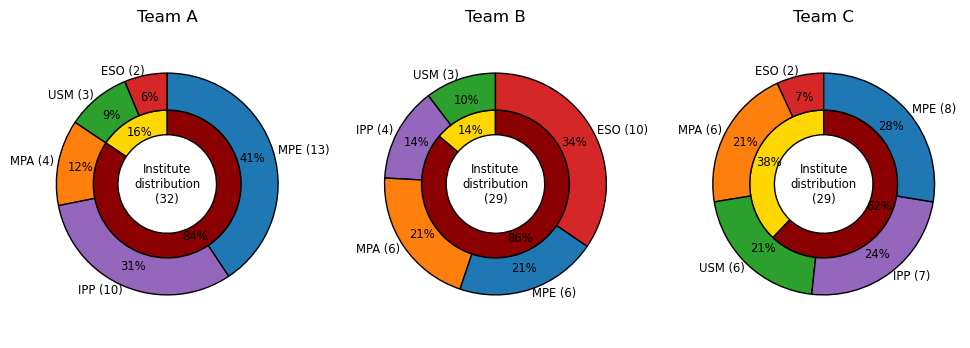

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, team in zip(axes, hf.ALL_TEAMS):
    plt.sca(ax)
    hf.create_institute_plot(team.player_df)
    ax.set_title(team.name)


In [21]:
teams[0].get_all_players_for_sport("chess")


,nickname,institute,is_postdoc,volleyball,running_sprints,basketball,chess,tennis,football,capture_the_flag,spikeball,beer_pong,ping_pong,foosball,num_sports,avail_monday,avail_tuesday,avail_thursday,avail_friday,late_entry
55,Clever Wombat,IPP,False,True,False,False,True,False,False,False,False,False,True,False,3,True,True,False,True,False
61,Trifling Tarpon,IPP,False,True,False,False,True,False,True,False,False,False,True,False,4,True,True,True,True,False
75,Awkward Cichlid,USM,False,False,False,False,True,False,True,False,True,False,True,False,4,True,True,True,True,False


## Make some plots

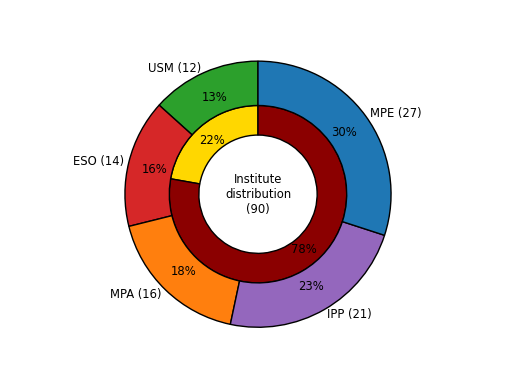

In [22]:
# Distribution of institutes
hf.create_institute_plot(df)


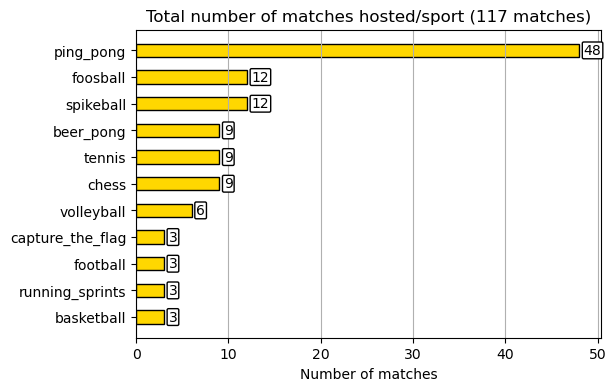

In [10]:
# Number of matches
fig, ax = plt.subplots(figsize=(6, 4))

match_totals: dict[str, int] = {flag: np.sum([match.sport == flag for match in hf.ALL_MATCHES]) for flag in hf.SPORTS_LIST}
match_totals = hf.sort_dict_by_values(match_totals)
values = list(match_totals.values())
y_positions = [i for i in range(len(hf.SPORTS_LIST))]
containers = ax.barh(
    y_positions, values, color="gold", edgecolor="black", linewidth=1, height=0.5  # type: ignore
)

plt.yticks(range(len(match_totals)), list(match_totals.keys()))
ax.set_xlabel("Number of matches")
ax.set_title(f"Total number of matches hosted/sport ({len(hf.ALL_MATCHES)} matches)")
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True, axis="x")
hf.annotate_barh_values(ax, containers, x_displacement=0.5)


### Open questions for meeting

- How to handle late entries?
- How to handle collisions in general?
- How to handle running/sprints? Shall I generate subteams for relay?
- How to handle capture the flag event?
- How to handle ping pong?
- How to handle times and people that cannot attend anymore?
- Review email text.

TODOs:

- [x] Tabs for teams. 
- [x] Speak to Matteo, Juan and David.
- [x] Running/sprints: minimum number of people: 4 per main team. First one-and-a-half hours reserved.
- [] Mention medical survice on the website.
- [] What to bring: team-colored T-shirt, sports clothes, water bottle.
- [] Mention late entries on the website.
- [] Put location warning in beginning.
- [] Send CSVs with the mapping along with the mail.
- [] Set up signal groups for each main team.
- [] Add results page where there's a df that displays total team points for each sport, and then a tabbed view where only the results of each sport may be reviewed.
- [] Add event for Award ceremony.
- [] Fix calendar in schedule.
- [] Fix the linking problem.
- [] Ping pong: Make schedule a tabbed view.
- [] Add FAQ:
  - Why am I only set as double reserve player? -> Also let us know where you sub in so we can register you.
  - How does scoring system work?


## Questions that you might have

### Why all this hassle with the big teams and subteams? How does the scoring system work?

We have opted for this way of organizing the sports week as it offers many advantages over treating the sports completely separately; it

### I have signed up for way more sports than I am now scheduled. Why?

To ensure a good flow during the events, we set up the schedules to avoid overlaps for players, if you e.g. signed up for Basketball and Volleyball (which both take place on Monday), you will be scheduled as reserve for at least one of them. For all events except for Ping Pong, Foosball, Spikeball, and Tennis, that means that you may substitute in in whichever subteam you choose.\
This way, you are more flexible, and you won't encounter stressful duble-bookings.

### I cannot make it on one of the days, can I still attend on the others?

Sure, just ensure you've notified us about any matches that you need to drop out of.

### Can I reschedule one of my ping pong matches?

Since ping pong is going to take place during the whole week and some of the slots are somewhat late, we allow you to easily reschedule a match, even to times not specified in our schedule - as long as your opponent agrees to it, you're free to find your own time. If you want to play during some of the main times, please first look at the general schedule and find a time and table that is not taken.\
After you've settled for a new time and place, please send us an email (preferably with your opponent in cc), or a signal message.